In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [7]:
swings_2024

pitch_type   game_date  release_speed       player_name  batter  \
0              FF  2024-09-30           94.2       Díaz, Edwin  621566   
1              CU  2024-09-30           86.4   Johnson, Pierce  596019   
2              SL  2024-09-30           89.7       Díaz, Edwin  542303   
3              SL  2024-09-30           89.5       Díaz, Edwin  542303   
4              FF  2024-09-30           96.9       Díaz, Edwin  542303   
...           ...         ...            ...               ...     ...   
196956         SI  2024-04-03           92.3     Keller, Mitch  682928   
196957         FF  2024-04-03           92.4     Keller, Mitch  682928   
196958         CH  2024-04-03           83.3  Williams, Trevor  668804   
196959         CH  2024-04-03           82.5  Williams, Trevor  665833   
196960         CH  2024-04-03           83.1  Williams, Trevor  665833   

        pitcher     events      description  \
0        621242  field_out    hit_into_play   
1        572955   home_run    hit_into_play   
2        621242  strikeout  swinging_strike   
3        621242        NaN  swinging_strike   
4        621242        NaN             foul   
...         ...        ...              ...   
196956   656605  field_out    hit_into_play   
196957   656605        NaN             foul   
196958   592866  field_out    hit_into_play   
196959   592866  strikeout  swinging_strike   
196960   592866        NaN             foul   

                                                      des  zone  ...  \
0       Matt Olson pops out to shortstop Francisco Lin...  12.0  ...   
1       Francisco Lindor homers (33) on a fly ball to ...   8.0  ...   
2                     Marcell Ozuna strikes out swinging.   6.0  ...   
3                     Marcell Ozuna strikes out swinging.  14.0  ...   
4                     Marcell Ozuna strikes out swinging.   5.0  ...   
...                                                   ...   ...  ...   
196956  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196957  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196958  Bryan Reynolds lines out to right fielder Lane...   5.0  ...   
196959                   Oneil Cruz strikes out swinging.  13.0  ...   
196960                   Oneil Cruz strikes out swinging.  13.0  ...   

       estimated_woba_using_speedangle woba_value arm_angle bat_speed  \
0                                0.039        0.0      17.8      77.4   
1                                1.621        2.0      39.4      80.2   
2                                0.000        0.0      25.3      78.4   
3                                  NaN        NaN      22.1      79.5   
4                                  NaN        NaN      18.4      77.4   
...                                ...        ...       ...       ...   
196956                           0.003        0.0      31.7      64.2   
196957                             NaN        NaN      31.5      66.8   
196958                           0.439        0.0      15.5      70.9   
196959                           0.000        0.0      14.8      82.1   
196960                             NaN        NaN      15.8      81.3   

        swing_length  bat_speed_pred  swing_length_pred  bat_speed_residual  \
0                7.0       72.630213           6.851235            4.769787   
1                8.1       73.566324           7.948831            6.633676   
2                8.1       74.373570           7.287232            4.026430   
3                8.5       69.598224           8.102444            9.901776   
4                8.0       73.445847           6.833112            3.954153   
...              ...             ...                ...                 ...   
196956           6.2       67.746497           6.518272           -3.546497   
196957           6.0       69.811933           6.778951           -3.011933   
196958           7.2       71.598932           6.546403           -0.698932   
196959           8.5 

In [8]:
luis_robert = swings_2024[swings_2024["batter"] == 673357]

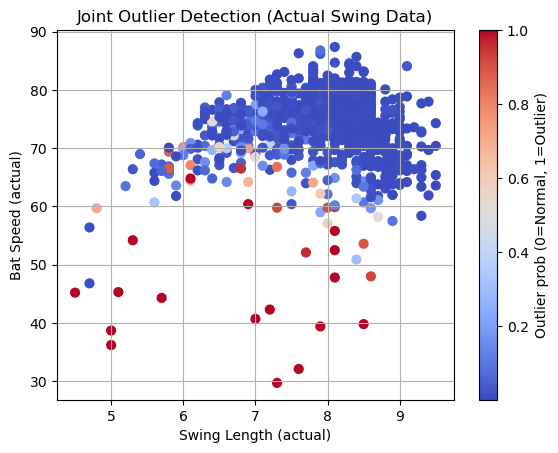

In [9]:
plt.scatter(luis_robert["swing_length"], luis_robert["bat_speed"],
            c=luis_robert["outlier_prob"], cmap="coolwarm", s=40)
plt.colorbar(label="Outlier prob (0=Normal, 1=Outlier)")
plt.xlabel("Swing Length (actual)")
plt.ylabel("Bat Speed (actual)")
plt.title("Joint Outlier Detection (Actual Swing Data)")
plt.grid(True)
plt.show()

In [12]:
from baseball_utilities.display import *
set_pandas_display_all()

In [13]:
luis_robert.sort_values(by="outlier_prob", ascending=False)

pitch_type   game_date  release_speed               player_name  \
81984          SL  2024-07-19           88.4               Marsh, Alec   
70745          KC  2024-07-28           85.1             Miller, Bryce   
3403           CH  2024-09-26           78.3           Anderson, Tyler   
116754         FF  2024-06-15           94.8            McGough, Scott   
49277          FF  2024-08-16           95.5       Arrighetti, Spencer   
59821          SL  2024-08-07           80.0               Estes, Joey   
62931          FF  2024-08-04           93.3  Woods Richardson, Simeon   
31698          CU  2024-08-31           78.8            Quintana, Jose   
116728         FF  2024-06-15           97.1            Vieira, Thyago   
59860          FF  2024-08-07           91.2               Estes, Joey   
59858          ST  2024-08-07           77.8               Estes, Joey   
116729         SL  2024-06-15           88.1            Vieira, Thyago   
55486          FF  2024-08-10           93.0            Steele, Justin   
69734          SI  2024-07-29           93.4               Marsh, Alec   
5387           SI  2024-09-24           96.3         Kochanowicz, Jack   
40051          SL  2024-08-24           89.6             Skubal, Tarik   
5389           SI  2024-09-24           95.9         Kochanowicz, Jack   
73487          SL  2024-07-26           88.2             Kirby, George   
3371           CH  2024-09-26           81.3          Rosenberg, Kenny   
62930          SL  2024-08-04           85.9  Woods Richardson, Simeon   
14476          CH  2024-09-16           88.6            Zuñiga, Guillo   
22667          ST  2024-09-08           80.8            Fitts, Richard   
28308          CU  2024-09-03           78.7              Povich, Cade   
8862           SL  2024-09-21           88.7             Scott, Tanner   
113457         CU  2024-06-18           81.3           Valdez, Framber   
55522          FF  2024-08-10           92.9            Steele, Justin   
35207          FF  2024-08-28           95.6              Leiter, Jack   
46811          CH  2024-08-18           91.7           Valdez, Framber   
13278          SL  2024-09-17           86.0          Canning, Griffin   
65588          FF  2024-08-02           94.4                 Ryan, Joe   
35253          FF  2024-08-28           97.3              Leiter, Jack   
65621          FS  2024-08-02           90.4                 Ryan, Joe   
113427         FF  2024-06-18           96.5           Montero, Rafael   
19558          FF  2024-09-11           94.0             Boyd, Matthew   
30375          FF  2024-09-01           92.5              Manaea, Sean   
111230         FF  2024-06-20           97.2              Abreu, Bryan   
60971          FF  2024-08-06           95.6            Reyes, Gerardo   
104284         SL  2024-06-26           88.9              Stone, Gavin   
20753          SL  2024-09-10           86.8               Morgan, Eli   
56932          SI  2024-08-09           91.5          Taillon, Jameson   
10213          FC  2024-09-20           88.9             Musgrove, Joe   
80733          SI  2024-07-20           93.9             Singer, Brady   
71991          SL  2024-07-27           86.6             Muñoz, Andrés   
44032          SI  2024-08-21           93.3               Webb, Logan   
45298          SL  2024-08-20           71.7             Rogers, Tyler   
104210         SI  2024-06-26           94.9              Stone, Gavin   
104227         SL  2024-06-26           86.1              Stone, Gavin   
17596          SI  2024-09-13           96.7           Ferguson, Tyler   
23852          SI  2024-09-07           87.4          Criswell, Cooper   
127882         SI  2024-06-05           93.0          Taillon, Jameson   
30339          SL  2024-09-01           91.7               Díaz, Edwin   
40050          FF  2024-08-24           97.8             Skubal, Tarik   
84526          FF  2024-07-13           96.9            Ortiz, Luis L.   
7821       

In [27]:
from baseball_utilities.data import *
pbp_2024 = get_table("statcast_2024")

In [3]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [32]:
swings_2024 = swings_2024.merge(
    pbp_2024[['batter', 'batter_name']].drop_duplicates(),
    on='batter',
    how='left'
)

In [36]:
swings_2024

pitch_type   game_date  release_speed       player_name  batter  \
0              FF  2024-09-30           94.2       Díaz, Edwin  621566   
1              CU  2024-09-30           86.4   Johnson, Pierce  596019   
2              SL  2024-09-30           89.7       Díaz, Edwin  542303   
3              SL  2024-09-30           89.5       Díaz, Edwin  542303   
4              FF  2024-09-30           96.9       Díaz, Edwin  542303   
...           ...         ...            ...               ...     ...   
196956         SI  2024-04-03           92.3     Keller, Mitch  682928   
196957         FF  2024-04-03           92.4     Keller, Mitch  682928   
196958         CH  2024-04-03           83.3  Williams, Trevor  668804   
196959         CH  2024-04-03           82.5  Williams, Trevor  665833   
196960         CH  2024-04-03           83.1  Williams, Trevor  665833   

        pitcher     events      description  \
0        621242  field_out    hit_into_play   
1        572955   home_run    hit_into_play   
2        621242  strikeout  swinging_strike   
3        621242        NaN  swinging_strike   
4        621242        NaN             foul   
...         ...        ...              ...   
196956   656605  field_out    hit_into_play   
196957   656605        NaN             foul   
196958   592866  field_out    hit_into_play   
196959   592866  strikeout  swinging_strike   
196960   592866        NaN             foul   

                                                      des  zone  ...  \
0       Matt Olson pops out to shortstop Francisco Lin...  12.0  ...   
1       Francisco Lindor homers (33) on a fly ball to ...   8.0  ...   
2                     Marcell Ozuna strikes out swinging.   6.0  ...   
3                     Marcell Ozuna strikes out swinging.  14.0  ...   
4                     Marcell Ozuna strikes out swinging.   5.0  ...   
...                                                   ...   ...  ...   
196956  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196957  CJ Abrams pops out to third baseman Ke'Bryan H...   2.0  ...   
196958  Bryan Reynolds lines out to right fielder Lane...   5.0  ...   
196959                   Oneil Cruz strikes out swinging.  13.0  ...   
196960                   Oneil Cruz strikes out swinging.  13.0  ...   

       woba_value arm_angle bat_speed swing_length  bat_speed_pred  \
0             0.0      17.8      77.4          7.0       72.630213   
1             2.0      39.4      80.2          8.1       73.566324   
2             0.0      25.3      78.4          8.1       74.373570   
3             NaN      22.1      79.5          8.5       69.598224   
4             NaN      18.4      77.4          8.0       73.445847   
...           ...       ...       ...          ...             ...   
196956        0.0      31.7      64.2          6.2       67.746497   
196957        NaN      31.5      66.8          6.0       69.811933   
196958        0.0      15.5      70.9          7.2       71.598932   
196959        0.0      14.8      82.1          8.5       73.092508   
196960        NaN      15.8      81.3          8.6       74.307867   

        swing_length_pred  bat_speed_residual  swing_length_residual  \
0                6.851235            4.769787               0.148765   
1                7.948831            6.633676               0.151169   
2                7.287232            4.026430               0.812768   
3                8.102444            9.901776               0.397556   
4                6.833112            3.954153               1.166888   
...                   ...                 ...                    ...   
196956           6.518272           -3.546497              -0.318272   
196957           6.778951           -3.011933              -0.778951   
196958           6.546403           -0.698932               0.653597   
196959           8.483885            9.007492               0.016115   
196960           8.540348            6.992133          

In [38]:
batter_outlier_avg = (
    swings_2024
    .groupby(["batter", "batter_name"])
    .agg(
        total_outlier_prob=("outlier_prob", "sum"),
        num_swings=("batter", "size")
    )
    .assign(avg_outlier_prob=lambda df: df["total_outlier_prob"] / df["num_swings"])
    .sort_values("avg_outlier_prob", ascending=False)
)

In [42]:
batter_outlier_avg.head(25)

total_outlier_prob  num_swings  avg_outlier_prob
batter batter_name                                                        
664983 Jake McCarthy              400.005202         800          0.500007
665862 Jazz Chisholm              507.881185        1016          0.499883
665926 Andrés Giménez             432.505000        1219          0.354803
514888 José Altuve                331.861284        1120          0.296305
661388 William Contreras          347.867662        1202          0.289407
650489 Willi Castro               324.074058        1210          0.267830
678662 Ezequiel Tovar             354.595408        1420          0.249715
665489 Vladimir Guerrero          278.000668        1150          0.241740
670032 Nicky Lopez                167.127532         711          0.235060
650490 Yandy Díaz                 229.799659         992          0.231653
660821 Jesús Sánchez              209.823760         982          0.213670
680977 Brendan Donovan            188.994662         999          0.189184
681351 Logan O'Hoppe              175.695172         949          0.185137
657077 Alex Verdugo               171.546953         933          0.183866
657041 Lane Thomas                155.442773         858          0.181169
670623 Isaac Paredes              197.998077        1187          0.166805
606115 Orlando Arcia              172.914784        1039          0.166424
676609 José Caballero             137.201559         832          0.164906
600869 Jeimer Candelario          134.565981         834          0.161350
680777 Ryan Jeffers               133.982835         833          0.160844
621566 Matt Olson                 215.208858        1360          0.158242
663616 Trevor Larnach             105.245390         674          0.156150
623993 Anthony Santander          201.657345        1299          0.155240
457705 Andrew McCutchen           128.576117         849          0.151444
641933 Tyler O'Neill              118.686404         809          0.146708

In [43]:
batter_outlier_avg.tail(25)

total_outlier_prob  num_swings  avg_outlier_prob
batter batter_name                                                        
502054 Tommy Pham                  41.834617         762          0.054901
668930 Brice Turang                56.271062        1029          0.054685
607208 Trea Turner                 54.454829        1001          0.054400
624585 Jorge Soler                 52.434043         971          0.054000
650402 Gleyber Torres              63.681562        1194          0.053335
660688 Keibert Ruiz                43.187615         811          0.053252
593428 Xander Bogaerts             37.028257         713          0.051933
519317 Giancarlo Stanton           40.178363         783          0.051313
669016 Brandon Marsh               38.368184         775          0.049507
592450 Aaron Judge                 53.937645        1107          0.048724
573262 Mike Yastrzemski            40.450432         835          0.048444
645277 Ozzie Albies                39.544633         838          0.047189
668715 Spencer Steer               51.677355        1100          0.046979
608324 Alex Bregman                46.434542        1000          0.046435
656775 Cedric Mullins              41.551837         905          0.045914
669707 Jared Triolo                35.263801         769          0.045857
647304 Josh Naylor                 49.502129        1090          0.045415
608369 Corey Seager                40.507305         904          0.044809
657557 Paul DeJong                 44.351055        1030          0.043059
670541 Yordan Álvarez              41.085411        1000          0.041085
656811 Ryan O'Hearn                34.418324         859          0.040068
682985 Riley Greene                38.531298         981          0.039278
682998 Corbin Carroll              38.032313         998          0.038109
664728 Kyle Isbel                  22.636787         670          0.033786
668939 Adley Rutschman             26.694171        1090          0.024490

In [73]:
jake_mccarthy = swings_2024[swings_2024["batter"] == 606115]

In [63]:
from baseball_utilities.display import *
set_pandas_display_all()
pd.set_option('display.max_rows', None)

In [74]:
jake_mccarthy

pitch_type   game_date  release_speed               player_name  \
30             SI  2024-09-30           97.3         Brazobán, Huascar   
31             SI  2024-09-30           96.3         Brazobán, Huascar   
32             SI  2024-09-30           96.0         Brazobán, Huascar   
52             FF  2024-09-30           96.3             Megill, Tylor   
53             SI  2024-09-30           94.8             Megill, Tylor   
54             SL  2024-09-30           86.1             Megill, Tylor   
79             SL  2024-09-30           86.6             Megill, Tylor   
80             SI  2024-09-30           95.6             Megill, Tylor   
81             SI  2024-09-30           95.8             Megill, Tylor   
121            FC  2024-09-30           91.5         Brazobán, Huascar   
141            SI  2024-09-30           90.7            Lucchesi, Joey   
142            CU  2024-09-30           78.5            Lucchesi, Joey   
143            CU  2024-09-30           77.2            Lucchesi, Joey   
164            FC  2024-09-30           89.9            Lucchesi, Joey   
296            FF  2024-09-29           96.9         Hernández, Carlos   
317            SL  2024-09-29           85.0               Marsh, Alec   
337            SI  2024-09-29           95.4               Marsh, Alec   
338            SI  2024-09-29           92.8               Marsh, Alec   
1163           FF  2024-09-28           92.9           Schreiber, John   
1189           FF  2024-09-28           93.9          Lynch IV, Daniel   
1209           ST  2024-09-28           83.2         Lorenzen, Michael   
2320           KC  2024-09-27           84.7         Hernández, Carlos   
2321           FF  2024-09-27           96.7         Hernández, Carlos   
2322           SL  2024-09-27           83.8         Hernández, Carlos   
2339           ST  2024-09-27           81.0             Singer, Brady   
2340           SI  2024-09-27           92.0             Singer, Brady   
2341           SL  2024-09-27           83.8             Singer, Brady   
2354           SL  2024-09-27           83.4             Singer, Brady   
2355           ST  2024-09-27           83.2             Singer, Brady   
5294           SI  2024-09-24           98.8         Brazobán, Huascar   
5295           CH  2024-09-24           92.5         Brazobán, Huascar   
5296           SI  2024-09-24           98.6         Brazobán, Huascar   
5297           SI  2024-09-24           96.8         Brazobán, Huascar   
5317           SI  2024-09-24           95.1            Severino, Luis   
5334           SI  2024-09-24           95.4            Severino, Luis   
5335           FF  2024-09-24           96.1            Severino, Luis   
7416           SL  2024-09-22           85.5           Bender, Anthony   
7417           ST  2024-09-22           85.4           Bender, Anthony   
7433           CU  2024-09-22           72.7            Curry, Xzavion   
7434           SL  2024-09-22           82.0            Curry, Xzavion   
7444           FF  2024-09-22           95.8             Baumann, Mike   
7458           CH  2024-09-22           81.0         McCaughan, Darren   
7459           ST  2024-09-22           80.8         McCaughan, Darren   
7460           ST  2024-09-22           82.2         McCaughan, Darren   
8568           SL  2024-09-21           84.0            Curry, Xzavion   
8569           SL  2024-09-21           83.6            Curry, Xzavion   
8585           SV  2024-09-21           85.0               Oller, Adam   
8586           SV  2024-09-21           84.9               Oller, Adam   
8603           SV  2024-09-21           86.3               Oller, Adam   
8604           FF  2024-09-21           93.0               Oller, Adam   
8605           SV  2024-09-21           84.5               Oller, Adam   
8619           SV  2024-09-21           86.5               Oller, Adam   
8620           FF  2024-09-21           94.3               Oller, Adam   
8621       

In [75]:
jake_mccarthy.sort_values(by="outlier_prob", ascending=False)

pitch_type   game_date  release_speed               player_name  \
31070          ST  2024-09-01           87.1          Kerkering, Orion   
58165          FS  2024-08-08           86.2           Montas, Frankie   
8621           FF  2024-09-21           94.3               Oller, Adam   
17564          SL  2024-09-13           88.7            Grove, Michael   
31104          KC  2024-09-01           79.1               Nola, Aaron   
53992          FF  2024-08-12           96.3              Snell, Blake   
31122          KC  2024-09-01           78.9               Nola, Aaron   
73969          FO  2024-07-26           82.9              Senga, Kodai   
133249         CH  2024-05-31           83.6                 Sears, JP   
10717          SI  2024-09-19           93.3            Aguiar, Julian   
35776          CH  2024-08-28           91.7          Henriquez, Ronny   
79             SL  2024-09-30           86.6             Megill, Tylor   
149303         SI  2024-05-17           89.6             Waldron, Matt   
90655          SL  2024-07-08           82.1              Díaz, Yilber   
155107         ST  2024-05-12           85.1             Garrett, Reed   
118001         ST  2024-06-14           77.1              Kelly, Kevin   
140806         SI  2024-05-25           94.3             Keller, Mitch   
165193         SI  2024-05-03           95.9              Stone, Gavin   
53975          FF  2024-08-12           95.4              Snell, Blake   
153434         ST  2024-05-13           83.5          Wesneski, Hayden   
48085          SL  2024-08-17           87.3          Canning, Griffin   
149304         KN  2024-05-17           75.2             Waldron, Matt   
112040         FF  2024-06-19           97.1             Skubal, Tarik   
62273          FF  2024-08-04           94.5           Soriano, George   
12975          FS  2024-09-17           81.2            Cruz, Fernando   
91240          SI  2024-07-07           95.8                Ruiz, José   
54             SL  2024-09-30           86.1             Megill, Tylor   
192138         FF  2024-04-07           95.2              Nelson, Ryne   
72566          SL  2024-07-27           85.6             Megill, Tylor   
22502          SL  2024-09-08           86.7             Swanson, Erik   
152175         SI  2024-05-14           91.5                Cuas, Jose   
130761         SL  2024-06-02           87.9             Adams, Austin   
26235          SL  2024-09-05           84.7            Gomber, Austin   
42429          SI  2024-08-22           94.2       Sánchez, Cristopher   
165133         SI  2024-05-03           99.3                Kelly, Joe   
157600         SI  2024-05-10           92.9            Ramírez, Yohan   
109449         SL  2024-06-22           84.4           Stroman, Marcus   
187775         FF  2024-04-12           96.9              Smith, Burch   
144368         ST  2024-05-21           81.1          Wesneski, Hayden   
168521         SI  2024-04-30           95.6            Castillo, Luis   
126750         CU  2024-06-07           83.0               Irvin, Jake   
153451         ST  2024-05-13           83.3          Wesneski, Hayden   
157580         SI  2024-05-10           90.8            Houser, Adrian   
11662          CH  2024-09-18           89.3           Legumina, Casey   
162613         FF  2024-05-05           94.3             Paxton, James   
157581         SL  2024-05-10           80.6            Houser, Adrian   
14125          FF  2024-09-16           95.3       Yamamoto, Yoshinobu   
57080          FF  2024-08-09           94.3            Gordon, Tanner   
139607         SL  2024-05-26           88.3        Mlodzinski, Carmen   
50448          FF  2024-08-15           93.1               Webb, Logan   
119308         FF  2024-06-13           91.5               Irvin, Cole   
118018         ST  2024-06-14           80.3             Littell, Zack   
169455         SI  2024-04-29           96.0             Miller, Bryce   
41124      

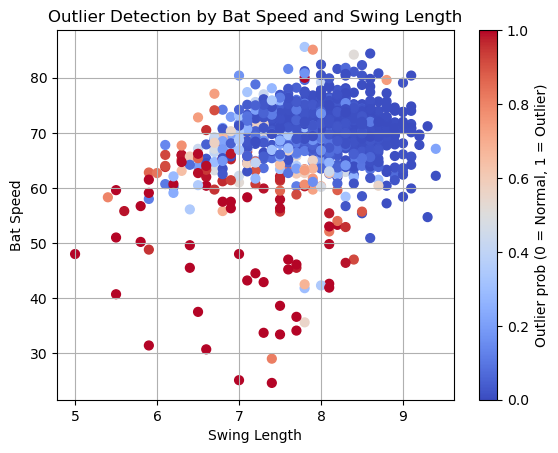

In [76]:
plt.scatter(
    x = jake_mccarthy["swing_length"],
    y = jake_mccarthy["bat_speed"],
    c = jake_mccarthy["outlier_prob"],
    cmap= "coolwarm",
    s = 40,
    vmin = 0,
    vmax = 1)
plt.colorbar(label = "Outlier prob (0 = Normal, 1 = Outlier)")
plt.xlabel("Swing Length")
plt.ylabel("Bat Speed")
plt.title("Outlier Detection by Bat Speed and Swing Length")
plt.grid(True)
plt.show()

Notes:
Jazz Chisholm and Jake Mccarthy are the leaders in greatest however, their bounds on outlier probabilities seem to be stuck around .5 for every swing. Will have to check model diagnostics a little further as well as residuals.

For Andres Gimenez, the true leader, alot of datapoints seem to lead to slower swings on pitches that already are expected to have slow swings (small residuals). I believe this is because his bat speed distribution is bimodal, with several peaks. The model currently assumes a normal distribution of bat speeds and swing lengths currently which would in turn make multimodality an issue. In baseball terms, I hypothesize that he has A and B swings that are shaping his bat speed due to other factors. The next feature I will look to add is controlling for count.